# Getting Started: Keras with a Tensorflow Backend (In Anaconda)

Install Miniconda from https://conda.io/miniconda.html (Python 3.6) and launch the Anaconda prompt. Create a new environment and call it whatever you want (1), then activate this environment (2). Install spyder (3), then install Tensorflow using conda install, or failing that, pip (4). From the taskbar, click on Anaconda folder and then open spyder(your_env_name).

In [80]:
'''(1) conda create -n your_env_name python=3.6'''

'''(2) activate your_env_name'''

'''(3) conda install spyder'''

'''(4) conda install -c conda-forge tensorflow /
       pip install tensorlow '''
    

'(4) conda install -c conda-forge tensorflow /\n       pip install tensorlow '

Import relevant modules such as tensorflow, NumPy, SciPy and matplotlib. For image processing you may also need to install and import PIL.

In [81]:
import scipy.io as sio

import tensorflow as tf

import tensorflow.keras as keras

import numpy as np

import matplotlib.pyplot as plt

from keras.callbacks import History 
history = History()


# MNIST

The MNIST data set is a great place to start. It contains labelled 28 X 28 pixel images of handwritten digits from 0 to 9, and can be accessed through tensorflow as it's in their examples package. On this data even a very simple model can acheive accuracy (measured by the proportion of digits from the test set which are correctly identified) upwards of 98%, which varies depending on the network configuration.


Import the data using the line below:


In [82]:
from tensorflow.examples.tutorials.mnist import input_data

# Getting the Data

In [16]:
#Load MNIST Data--------------------------------------------------------------------------------

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)


#Identify images and labels---------------------------------------------------------------------

features = mnist.train.images      #Features are all the images of handwritten digits

labels = mnist.train.labels     #Labels describe above feaures

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Preparing the Data

In [83]:
#shuffle data---------------------------------------------------------------

ran = np.arange(features.shape[0])

np.random.shuffle(ran)

features = features[ran]

labels = labels[ran]


#Split data into training and test subsets------------------------------------

training_features = mnist.train.images.reshape(mnist.train.images.shape[0],28,28,1)

training_labels = mnist.train.labels

test_features = mnist.test.images.reshape(mnist.test.images.shape[0],28,28,1)

test_labels = mnist.test.labels

# Building a Sequential Model

Keras has two main methods for building models. The high level model building API accessed via keras.sequential() function allows you to quickly build a network model layer by layer using the keras.layers class of commonly used layer types. There is the option to construct layer types from scratch if it is required for more complex network designs.
We are going to build a dense neural network.

First we will build a model with no hidden layers, just the inputs and an output layer - the predictions will not be very accurate. Then we will add a hidden layer.

In [84]:
#Build model------------------------------------------------------------------

model_1 = keras.Sequential([

        keras.layers.Flatten(),
    
        keras.layers.Dense(10, input_dim = 784, activation = "sigmoid")
])

Above, we have 784 inputs (pixels) which have been flattened into a one dimensional array using the .Flatten() function. The Dense layer below acts as the output layer, with 10 neurons and a sigmoid activation function. The sigmoid function tends to work well for shallow networks and is traditionally the most used non-linear activation function. 

I am going to train this model and show you the output so that we can compare it to the more accurate model we are going to make shortly.

Epoch 1/5
55000/55000 [==============================] - 4s 76us/step - loss: 0.5038 - acc: 0.8741
Epoch 2/5
55000/55000 [==============================] - 2s 40us/step - loss: 0.3105 - acc: 0.9134
Epoch 3/5
55000/55000 [==============================] - 2s 39us/step - loss: 0.2884 - acc: 0.9193
Epoch 4/5
55000/55000 [==============================] - 2s 43us/step - loss: 0.2775 - acc: 0.9223
Epoch 5/5
10000/10000 [==============================] - 1s 59us/step

acc: 92.44%


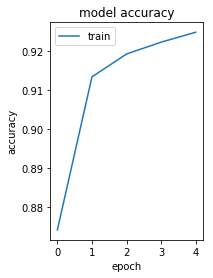

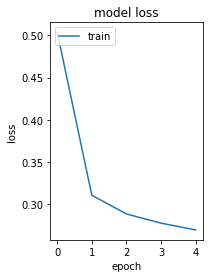

In [85]:
model_1.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(training_features , training_labels, epochs = 5)
scores = model_1.evaluate(test_features, test_labels)
print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

#Accuracy
plt.subplot(121)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Adding a Hidden Layer

In [138]:
#Build new model------------------------------------------------------------------

model_2 = keras.Sequential([

        keras.layers.Flatten(),
    
        keras.layers.Dense(30, input_dim = 784, activation = "relu"),
    
        keras.layers.Dense(30, activation = "relu"),
    
        keras.layers.Dense(10, activation = "sigmoid")
])

In [139]:
#Compile model----------------------------------------------------------------

model_2.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])

The Adam optimizer is a variation of the stochastic gradient descent algorithm where the learning rate is adjusted throughout training. It usually performs well in terms of speed, and does not get stuck and stop training at saddle points or local minima where the gradient is close to zero.

When solving an optimization problem we are trying to minimise the loss function (cost function) as this value represents the error in the output of the network. This error can be propagated back through the network, and the network weights can be adjusted accordingly. If your outputs are ones and zeros you can use categorical_crossentropy, but if they are integers 1,2,3,4... is is better to use sparse_categorical_crossentropy.

# Training the Model

In [140]:
#Train the model--------------------------------------------------------------------

history2 = model_2.fit(training_features , training_labels, epochs = 100)
print (model_2.summary())

Epoch 1/100
55000/55000 [==============================] - 6s 102us/step - loss: 0.3952 - acc: 0.8876
Epoch 2/100
55000/55000 [==============================] - 3s 55us/step - loss: 0.1948 - acc: 0.9442
Epoch 3/100
55000/55000 [==============================] - 3s 54us/step - loss: 0.1584 - acc: 0.9534
Epoch 4/100
55000/55000 [==============================] - 3s 54us/step - loss: 0.1362 - acc: 0.9594
Epoch 5/100
55000/55000 [==============================] - 3s 54us/step - loss: 0.1196 - acc: 0.9638
Epoch 6/100
55000/55000 [==============================] - 3s 54us/step - loss: 0.1099 - acc: 0.9666
Epoch 7/100
55000/55000 [==============================] - 3s 55us/step - loss: 0.0973 - acc: 0.9707: 0s - loss: 0.0946 - 
Epoch 8/100
55000/55000 [==============================] - 3s 57us/step - loss: 0.0912 - acc: 0.9719
Epoch 9/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.0844 - acc: 0.9733
Epoch 10/100
55000/55000 [==============================] - 3s 60us/

55000/55000 [==============================] - 3s 59us/step - loss: 0.0107 - acc: 0.9967
Epoch 80/100
55000/55000 [==============================] - 3s 61us/step - loss: 0.0081 - acc: 0.9973
Epoch 81/100
55000/55000 [==============================] - 4s 67us/step - loss: 0.0098 - acc: 0.9967: 0s - loss: 0.0096 - acc: 0.9
Epoch 82/100
55000/55000 [==============================] - 3s 55us/step - loss: 0.0093 - acc: 0.9972
Epoch 83/100
55000/55000 [==============================] - 3s 61us/step - loss: 0.0093 - acc: 0.9972
Epoch 84/100
55000/55000 [==============================] - 3s 58us/step - loss: 0.0101 - acc: 0.9967
Epoch 85/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.0088 - acc: 0.9970: 1s - loss: 
Epoch 86/100
55000/55000 [==============================] - 4s 65us/step - loss: 0.0112 - acc: 0.9965
Epoch 87/100
55000/55000 [==============================] - 3s 61us/step - loss: 0.0075 - acc: 0.9977
Epoch 88/100
55000/55000 [==========================

The .fit() function trains the model on the training features and compares the outputs to the training labels. An epoch is a single pass through the whole dataset, where each training sample in the set is presented to the model once. Therefore the number of epochs is the number of complete cyles through the training data. The loss should decrease with every epoch until it levels out. The algorithm continues to run for the number of epochs you have specified, but can be stopped when the loss stops decreasing (you can set a condition for this).

# Cross-Validation

In [141]:
#Predict the test set digits--------------------------------------------------

scores = model_2.evaluate(test_features, test_labels)

10000/10000 [==============================] - 1s 75us/step


The .evaluate() function predicts the test labels. We can then use the model.evaluate metrics function to display the accuracy of the model.
Accuracy is determined by comparing the predicted labels to the groundtruths.


acc: 96.50%


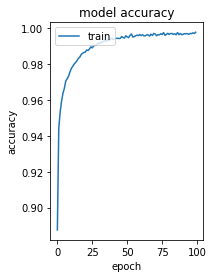

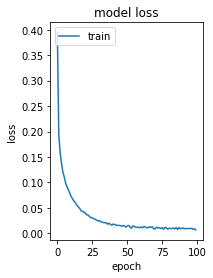

In [143]:
#Display the accuracy ---------------------------------------------------------

print("\n%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))

#Accuracy
plt.subplot(121)
plt.plot(history2.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.subplot(122)
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Using Convolutional Layers Instead of Dense

In [46]:
#Build new model------------------------------------------------------------------

new_model = keras.Sequential([

        keras.layers.Flatten(),
    
        #keras.layers.Dense(25, input_dim = 784, activation = "sigmoid"),
    
        keras.layers.Dense(10, input_dim = 784, activation = "sigmoid")
])

In [95]:
#Build new model------------------------------------------------------------------

model_3 = keras.Sequential([

        keras.layers.Conv2D(32,(3, 3),input_shape=(28,28,1), activation='relu'),
    
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
        keras.layers.Flatten(),
    
        keras.layers.Dense(25, input_dim = 784, activation = "sigmoid"),
    
        keras.layers.Dense(10, activation=tf.nn.softmax)
])

Above, we have two 2D convoltion layers followed by our densely connected layers. The maxpooling layers scale down the image by sliding a kernel window over the input array and picking the maximum value from that window. The softmax layer scales the outputs to between 1 and 0.

Epoch 1/5
55000/55000 [==============================] - 69s 1ms/step - loss: 0.3334 - acc: 0.9342
Epoch 2/5
55000/55000 [==============================] - 66s 1ms/step - loss: 0.0696 - acc: 0.9829
Epoch 3/5
55000/55000 [==============================] - 65s 1ms/step - loss: 0.0432 - acc: 0.9886
Epoch 4/5
55000/55000 [==============================] - 63s 1ms/step - loss: 0.0307 - acc: 0.9915: 1s - loss:
Epoch 5/5
10000/10000 [==============================] - 4s 447us/step

acc: 98.97%


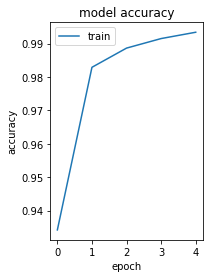

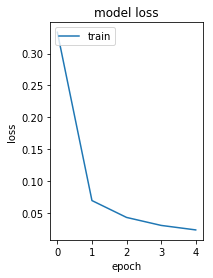

In [96]:
model_3.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model_3.fit(training_features , training_labels, epochs = 5)

scores = model_3.evaluate(test_features, test_labels)

print("\n%s: %.2f%%" % (model_3.metrics_names[1], scores[1]*100))

#Accuracy
plt.subplot(121)
plt.plot(history3.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.subplot(122)
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We have only run five epochs because of time considerations, but the training has not even converged. More epochs will improve the accuracy further.